# Pymaceuticals Inc.
---

### Analysis

- Interesting to see that the heavier the mouse, the heavier the average tumor that it had. Based on the summary table, Ramicane and Capomulin had the lowest average tumor sizes in the mice. It looks like Capomulin did help decrease most of the tumor sizes in the mice. 
 

In [305]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [355]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [356]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [357]:
# Optional: Get all the data for the duplicate mouse ID.
# dup_mouse_data = df[df["Mouse ID"] == 'g989']
# dup_mouse_data

duplicate_mouse_data = df.loc[df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [358]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989"]

# clean_df['Mouse ID'].value_counts()    checks to see if I only have one of each mouse ID
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [359]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [352]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped = clean_df.groupby('Drug Regimen')

mean_tumor_vol = grouped['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped['Tumor Volume (mm3)'].var()
std_dev_tumor_vol = grouped['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Variance Tumor Volume": variance_tumor_vol,
    "Tumor Volume Std. Dev": std_dev_tumor_vol,
    "Tumor Volume Std. Err": sem_tumor_vol,
                            })
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [338]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std='std',
    SEM='sem'
)
summary_stats

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

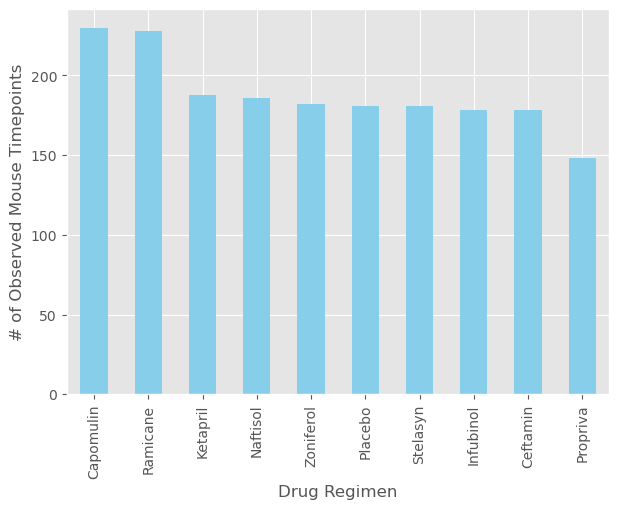

In [353]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='skyblue', ylabel= '# of Observed Mouse Timepoints', xlabel= 'Drug Regimen', figsize= (7,5))
plt.show()

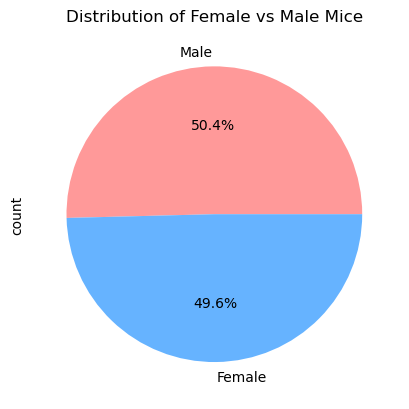

In [452]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset='Mouse ID')

gender_counts = unique_mice['Sex'].value_counts()

# print(gender_counts)

# Make the pie chart
gender_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], title='Distribution of Female vs Male Mice')
plt.show()

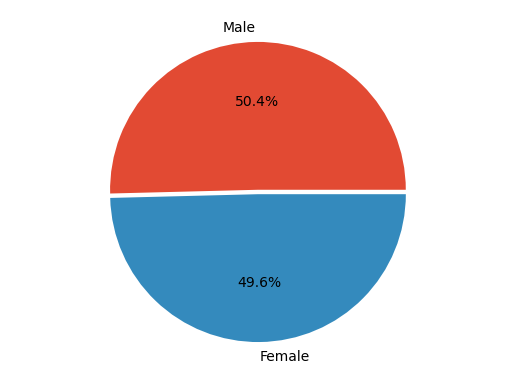

In [453]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study


# Make the pie chart
explode = [0.03,0]
plt.style.use('ggplot')
plt.axis('equal')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', explode=explode)
plt.show()

## Quartiles, Outliers and Boxplots

In [454]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='left')

# Filtered-df only includes Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2
1856,z581,Infubinol,Female,24,25,30,56.286750,2
1857,z581,Infubinol,Female,24,25,35,58.628399,3
1858,z581,Infubinol,Female,24,25,40,60.053740,3


In [455]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = filtered_df.loc[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # print(upper_bound, lower_bound)

    
    print(f"{treatment}'s potential outliers: {outliers}\n")


Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



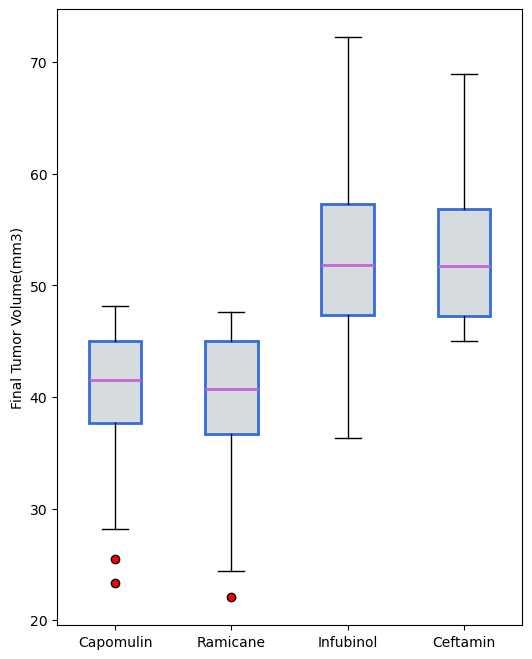

In [456]:
Capomulin = filtered_df.loc[filtered_df['Drug Regimen'] == "Capomulin"]['Tumor Volume (mm3)']
Ramicane = filtered_df.loc[filtered_df['Drug Regimen'] == "Ramicane"]['Tumor Volume (mm3)']
Infubinol = filtered_df.loc[filtered_df['Drug Regimen'] == "Infubinol"]['Tumor Volume (mm3)']
Ceftamin = filtered_df.loc[filtered_df['Drug Regimen'] == "Ceftamin"]['Tumor Volume (mm3)']

plt.figure(figsize=(6,8))
labels = treatments
plt.style.use("default")
boxes = plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], labels=treatments, patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o'), medianprops = dict(color="#c467d5", linewidth= 2))

for box in boxes['boxes']:
    #set edgecolor
    box.set(color='#346dd7', linewidth=2)
    #set fill color, patch_artist=True
    box.set(facecolor='#d6dbdf')


plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

In [473]:
filtered_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

filtered_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


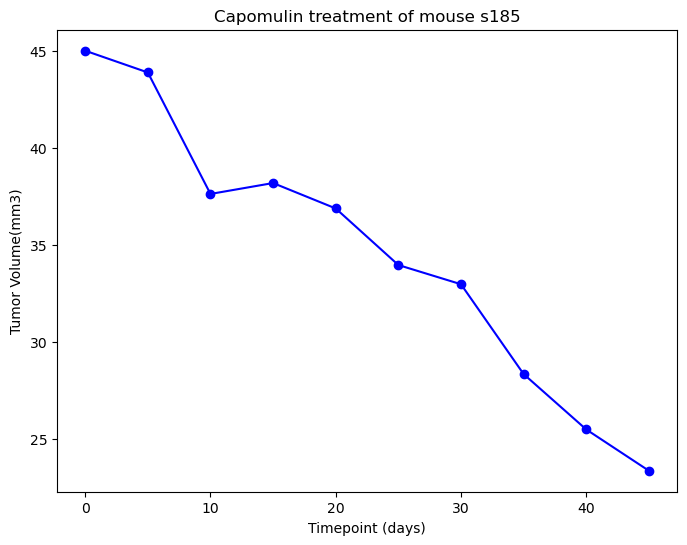

In [472]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# x401
mouse_id = 's185'
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Timepoint (days)")
plt.show()


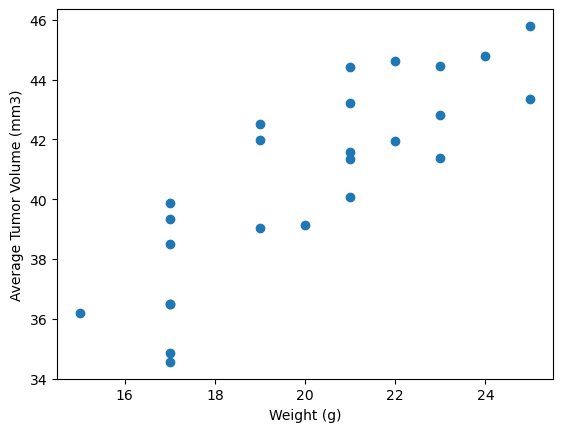

In [458]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#groupby Mouse ID and aclculate avg tumor volume and corresponding weight
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

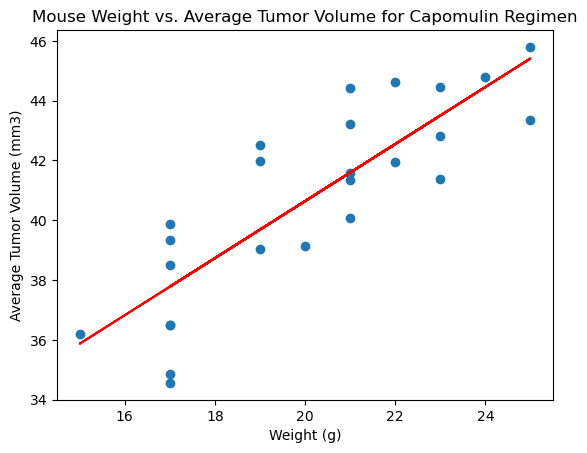

The correlation between mouse weight and the average tumor volume is 0.84


In [471]:
from scipy.stats import linregress
x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Plot the regression line
plt.plot(x_values,regress_values,"r-")

#Plot the data
plt.scatter(x_values,y_values)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")